In [4]:
import pandas as pd
from pathlib import Path
from glob import glob
import numpy as np
from datetime import datetime,timedelta
from tqdm.notebook import tqdm
import pynmea2

In [2]:
work_dir = Path.cwd() # set path to current working directory

In [3]:
files_list = glob(r'../../Data/Caravela/CaravelaPCS/Datalog/Y20/*/*'+ '/group1*')  #specify where the data is stored
files_list.sort() # sort the data files into order

li = []

for filename in tqdm(files_list):
    df = pd.read_csv(filename)
    li.append(df)

sl = pd.concat(li, axis=0) # read files and concatenate into pandas dataframe

In [4]:
#pick out the required columns
subset = pd.DataFrame()
subset['datetime'] = (sl['Date'].astype(str) +' '+ sl['Time'])
subset['heading'] = sl['U5_??HPR_F1']
subset['pitch'] = sl['U5_??HPR_F2']
subset['roll'] = sl['U5_??HPR_F3']
subset['latitude'] = sl['U5_??GGA_F2']
subset['latitude_hemisphere'] = sl['U5_??GGA_F3']
subset['longitude'] = sl['U5_??GGA_F4']
subset['longitude_hemisphere'] = sl['U5_??GGA_F5']
subset = subset.reset_index()

In [5]:
subset.head() #manually check the column contents make sense in the head

,index,datetime,heading,pitch,roll,latitude,latitude_hemisphere,longitude,longitude_hemisphere
0,0,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W
1,1,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W
2,2,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W
3,3,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W
4,4,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W


In [6]:
#parse datetime - done in two loops otherwise my laptop crashes
dt = []
for i in tqdm(range(0, 20000000)):
    dt.append(datetime.strptime(subset['datetime'][i], '%y%m%d %H:%M:%S').isoformat())
for i in tqdm(range(20000000, len(subset['datetime']))):
    dt.append(datetime.strptime(subset['datetime'][i], '%y%m%d %H:%M:%S').isoformat())
subset['datetime UTC'] = dt

In [7]:
subset.head()

,index,datetime,heading,pitch,roll,latitude,latitude_hemisphere,longitude,longitude_hemisphere,datetime UTC
0,0,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W,2020-01-15T12:02:42
1,1,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W,2020-01-15T12:02:42
2,2,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W,2020-01-15T12:02:42
3,3,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W,2020-01-15T12:02:42
4,4,200115 12:02:42,0.0,0.0,0.0,1306.64269,N,5937.83595,W,2020-01-15T12:02:42


In [8]:
subset = subset.drop(['index'],axis=1)

In [9]:
subset = subset.drop(['datetime'],axis=1)

In [10]:
subset = subset[(subset['datetime UTC'] >= '2020-01-22 00:00:00.000')] #select data from Caravela's launch onwards
subset

,heading,pitch,roll,latitude,latitude_hemisphere,longitude,longitude_hemisphere,datetime UTC
259171,0.0,0.0,0.0,1306.69354,N,5937.86230,W,2020-01-22T12:04:48
259172,0.0,0.0,0.0,1306.69354,N,5937.86238,W,2020-01-22T12:04:48
259173,0.0,0.0,0.0,1306.69354,N,5937.86245,W,2020-01-22T12:04:48
259174,0.0,0.0,0.0,1306.69355,N,5937.86259,W,2020-01-22T12:04:48
259175,0.0,0.0,0.0,1306.69355,N,5937.86272,W,2020-01-22T12:04:48
...,...,...,...,...,...,...,...,...
28779592,89.7,3.4,-0.9,1306.68676,N,5937.81694,W,2020-02-24T17:36:06
28779593,89.7,3.4,-0.9,1306.68676,N,5937.81695,W,2020-02-24T17:36:06
28779594,89.7,3.4,-0.9,1306.68675,N,5937.81697,W,2020-02-24T17:36:06
28779595,89.7,3.4,-0.9,1306.68675,N,5937.81698,W,2020-02-24T17:36:06


In [11]:
subset.to_csv('../../Products/CARAVELA_Motion.csv',index = None)#save file

In [1]:
baa = pd.read_csv('../../Products/CARAVELA_Motion.csv')# import file to test it

NameError: name 'pd' is not defined

# Checking the saved file

In [6]:
x=[] # parse the timestamp
for i in tqdm(range(len(baa['datetime UTC']))):
    x.append(datetime.fromisoformat(baa['datetime UTC'][i]))
baa['datetime_parsed'] = x

In [18]:
datetime.fromisoformat('2009-12-31T11:05:06')
datetime.strptime('2009/12/31 11:05:06', '%Y/%m/%d %H:%M:%S').isoformat()

'2009-12-31T11:05:06'

In [5]:
baa

,heading,pitch,roll,latitude,latitude_hemisphere,longitude,longitude_hemisphere,datetime UTC,datetime_parsed
0,0.0,0.0,0.0,1306.69354,N,5937.86230,W,2020-01-22T12:04:48,2020-01-22 12:04:48
1,0.0,0.0,0.0,1306.69354,N,5937.86238,W,2020-01-22T12:04:48,2020-01-22 12:04:48
2,0.0,0.0,0.0,1306.69354,N,5937.86245,W,2020-01-22T12:04:48,2020-01-22 12:04:48
3,0.0,0.0,0.0,1306.69355,N,5937.86259,W,2020-01-22T12:04:48,2020-01-22 12:04:48
4,0.0,0.0,0.0,1306.69355,N,5937.86272,W,2020-01-22T12:04:48,2020-01-22 12:04:48
...,...,...,...,...,...,...,...,...,...
28520421,89.7,3.4,-0.9,1306.68676,N,5937.81694,W,2020-02-24T17:36:06,2020-02-24 17:36:06
28520422,89.7,3.4,-0.9,1306.68676,N,5937.81695,W,2020-02-24T17:36:06,2020-02-24 17:36:06
28520423,89.7,3.4,-0.9,1306.68675,N,5937.81697,W,2020-02-24T17:36:06,2020-02-24 17:36:06
28520424,89.7,3.4,-0.9,1306.68675,N,5937.81698,W,2020-02-24T17:36:06,2020-02-24 17:36:06


In [10]:
#  check all lat, lon hemispheres are correct
baa.longitude_hemisphere.unique()

array(['W', '124419.4', 'N', ..., '1306.68359', '0000.25', '0000.18'],
      dtype=object)

### Quickplot to check timeseries is there

In [12]:
import matplotlib.pyplot as plt
font_size=23
plt.rcParams.update({'font.size': font_size})

Text(0.5, 0, 'Datetime')

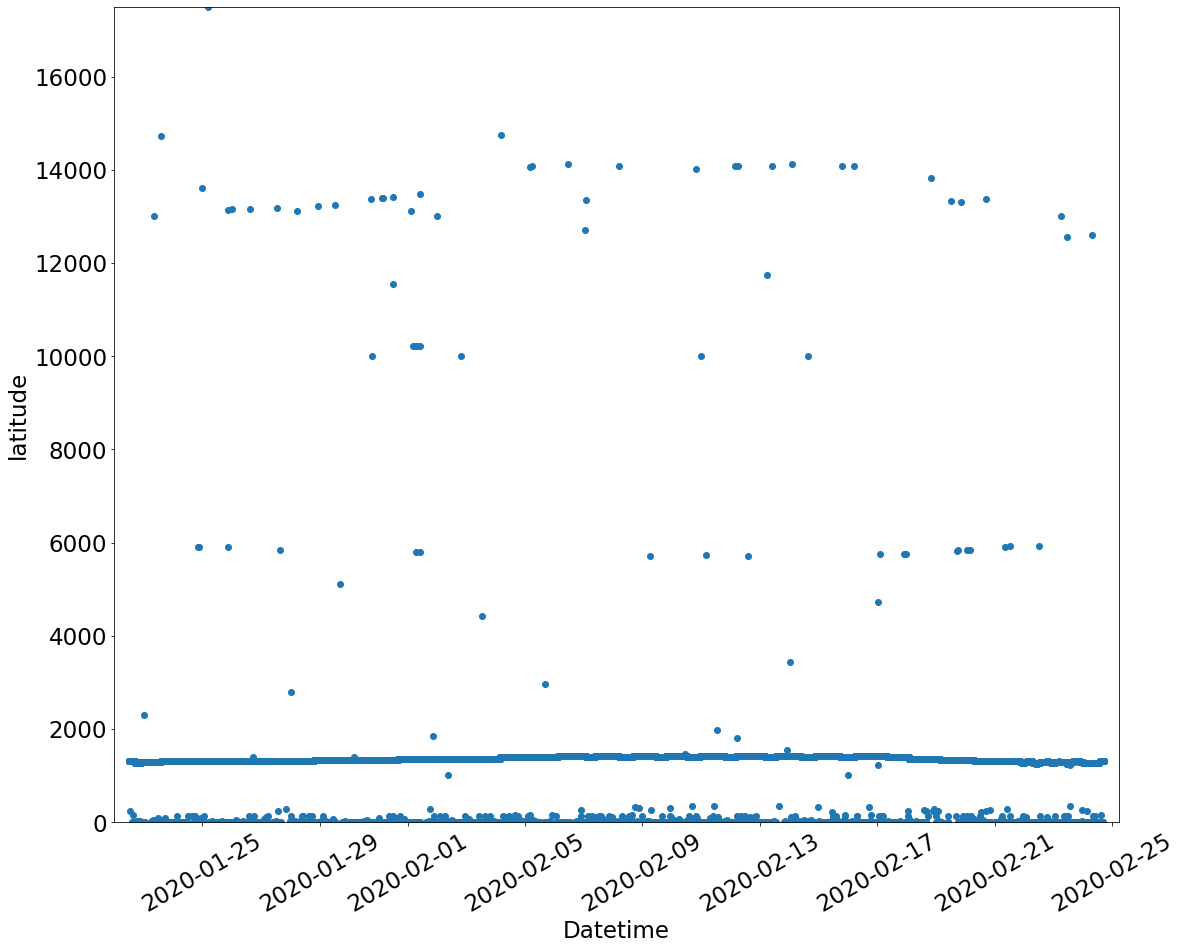

In [21]:
a = (baa.datetime_parsed.min() - timedelta(seconds = 3600*12)) 
b = (baa.datetime_parsed.max() + timedelta(seconds = 3600*12))

fig,ax = plt.subplots(1,1, figsize=(18, 15))
plt.xticks(rotation=30)
ax.set_xlim(a,b)
ax.set_ylim(0,17500)
ax.scatter(baa['datetime_parsed'], baa['latitude'])
ax.set_ylabel('latitude')
ax.set_xlabel('Datetime')


In [7]:
#Get a bool series representing which row satisfies the condition 
seriesObj = baa.apply(lambda x: True if x['latitude'] < 1250 or x['latitude'] > 1450 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

1364


In [8]:
#Get a bool series representing which row satisfies the condition 
seriesObj2 = baa.apply(lambda x: True if x['longitude'] < 5700 or x['latitude'] > 6000 else False , axis=1)
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
print(numOfRows2)

2363
